In [1]:
import pandas as pd

# Actual Dispatch Dataset

In [2]:
data_frames=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    #df2=pd.melt(df1,id_vars=['Power_Plant'])
    #df2['Date']=date
    #data_frames.append(df2)
    df1['Date']=date
    data_frames.append(df1)


In [3]:
#merge all the dataframes....
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames)
df_merged.shape

(1128, 50)

In [4]:
df_merged.head(10000)

,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
0,Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0,2020-07-01
1,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
2,Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,...,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2020-07-01
3,Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,...,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0,2020-07-01
4,Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,...,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,ALTAQQA-Pol.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31
1124,ALTAQQA-Mahi.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31
1125,Solar**,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-31
1126,Wind **,37.0,40.0,34.0,32.0,31.0,30.0,22.0,15.0,15.0,...,36.0,38.0,36.0,33.0,28.0,28.0,25.0,33.0,37.0,2020-07-31


In [5]:
data_frames[0].head(50)

,Power_Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
1,Canyon,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,...,60.0,60.0,60.0,60.0,60.0,60.0,30.0,0.0,0.0,2020-07-01
2,WPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
3,Olax,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,34.0,...,103.0,42.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2020-07-01
4,Nlax,91.0,39.0,34.0,19.0,20.0,22.0,31.0,59.0,84.0,...,212.0,210.0,210.0,168.0,36.0,58.0,71.0,76.0,54.0,2020-07-01
5,Polp,40.0,39.0,35.0,42.0,46.0,44.0,46.0,42.0,49.0,...,180.0,175.0,144.0,111.0,81.0,45.0,46.0,43.0,40.0,2020-07-01
6,Upper Kothmale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,106.0,131.0,90.0,80.0,0.0,0.0,0.0,0.0,2020-07-01
7,Koth,96.0,87.0,80.0,77.0,92.0,93.0,100.0,82.0,108.0,...,87.0,65.0,79.0,82.0,83.0,92.0,98.0,91.0,72.0,2020-07-01
8,Vict,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
9,Rand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-01
10,Rant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,60.0,40.0,40.0,39.0,0.0,0.0,0.0,0.0,2020-07-01


In [6]:
data_frames[0].dtypes

Power_Plant    object
00:00:00       object
00:30:00       object
01:00:00       object
01:30:00       object
02:00:00       object
02:30:00       object
03:00:00       object
03:30:00       object
04:00:00       object
04:30:00       object
05:00:00       object
05:30:00       object
06:00:00       object
06:30:00       object
07:00:00       object
07:30:00       object
08:00:00       object
08:30:00       object
09:00:00       object
09:30:00       object
10:00:00       object
10:30:00       object
11:00:00       object
11:30:00       object
12:00:00       object
12:30:00       object
13:00:00       object
13:30:00       object
14:00:00       object
14:30:00       object
15:00:00       object
15:30:00       object
16:00:00       object
16:30:00       object
17:00:00       object
17:30:00       object
18:00:00       object
18:30:00       object
19:00:00       object
19:30:00       object
20:00:00       object
20:30:00       object
21:00:00       object
21:30:00       object
22:00:00  

In [7]:
x=list(data_frames[0].columns)
x

['Power_Plant',
 '00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00',
 'Date']

In [8]:
x.pop(0) #remove the 1st column...
x.pop(-1) #remove last column(date)

'Date'

In [9]:
for i in x:
    print(i)
    data_frames[0][i] = data_frames[0][i].astype(float)

00:00:00
00:30:00
01:00:00
01:30:00
02:00:00
02:30:00
03:00:00
03:30:00
04:00:00
04:30:00
05:00:00
05:30:00
06:00:00
06:30:00
07:00:00
07:30:00
08:00:00
08:30:00
09:00:00
09:30:00
10:00:00
10:30:00
11:00:00
11:30:00
12:00:00
12:30:00
13:00:00
13:30:00
14:00:00
14:30:00
15:00:00
15:30:00
16:00:00
16:30:00
17:00:00
17:30:00
18:00:00
18:30:00
19:00:00
19:30:00
20:00:00
20:30:00
21:00:00
21:30:00
22:00:00
22:30:00
23:00:00
23:30:00


In [10]:
data_frames[0].dtypes

Power_Plant     object
00:00:00       float64
00:30:00       float64
01:00:00       float64
01:30:00       float64
02:00:00       float64
02:30:00       float64
03:00:00       float64
03:30:00       float64
04:00:00       float64
04:30:00       float64
05:00:00       float64
05:30:00       float64
06:00:00       float64
06:30:00       float64
07:00:00       float64
07:30:00       float64
08:00:00       float64
08:30:00       float64
09:00:00       float64
09:30:00       float64
10:00:00       float64
10:30:00       float64
11:00:00       float64
11:30:00       float64
12:00:00       float64
12:30:00       float64
13:00:00       float64
13:30:00       float64
14:00:00       float64
14:30:00       float64
15:00:00       float64
15:30:00       float64
16:00:00       float64
16:30:00       float64
17:00:00       float64
17:30:00       float64
18:00:00       float64
18:30:00       float64
19:00:00       float64
19:30:00       float64
20:00:00       float64
20:30:00       float64
21:00:00   

In [11]:
#check for null values...
df.isnull().sum()

0
Time     0
0:15     0
0:30     0
0:45     0
1:00     0
        ..
23:00    0
23:15    0
23:30    0
23:45    0
0:00     0
Length: 97, dtype: int64

## outlier detection by z-score

In [12]:
#outlier detection function...................
import numpy as np
def findoutliers(data):
    outliers=[]
    mean=np.mean(data)
    std=np.std(data)
    bound=3
    for i in data:
        z=(i-mean)/std
        if np.abs(z)>3:
            outliers.append(i)
    return outliers

In [13]:
#'00:00:00' outliers of 01-07-20 actual dispatch dataset....
out_1=findoutliers(data_frames[0]['00:00:00'])
out_1

[548.0, 540.0, 540.0]

In [14]:
cols=list(data_frames[0].columns)
cols

['Power_Plant',
 '00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00',
 'Date']

In [15]:
cols.remove('Power_Plant')
cols.remove('Date')

In [16]:
cols

['00:00:00',
 '00:30:00',
 '01:00:00',
 '01:30:00',
 '02:00:00',
 '02:30:00',
 '03:00:00',
 '03:30:00',
 '04:00:00',
 '04:30:00',
 '05:00:00',
 '05:30:00',
 '06:00:00',
 '06:30:00',
 '07:00:00',
 '07:30:00',
 '08:00:00',
 '08:30:00',
 '09:00:00',
 '09:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

In [17]:
#print all the outliers of 01-07-20 actual dispatch order by time in the day..(eg: [548.0, 540.0, 540.0]-->outliers of 00:00:00-00:00:30 time frame)
for i in cols:
    out_1=findoutliers(data_frames[0][i])
    print('time    :',i)
    print('outliers:',out_1)
    print('****************************')   

time    : 00:00:00
outliers: [548.0, 540.0, 540.0]
****************************
time    : 00:30:00
outliers: [548.0, 538.0, 540.0]
****************************
time    : 01:00:00
outliers: [547.0, 539.0, 541.0]
****************************
time    : 01:30:00
outliers: [545.0, 540.0, 541.0]
****************************
time    : 02:00:00
outliers: [545.0, 540.0, 541.0]
****************************
time    : 02:30:00
outliers: [545.0, 539.0, 541.0]
****************************
time    : 03:00:00
outliers: [542.0, 540.0, 542.0]
****************************
time    : 03:30:00
outliers: [547.0, 538.0, 540.0]
****************************
time    : 04:00:00
outliers: [546.0, 540.0, 541.0]
****************************
time    : 04:30:00
outliers: [548.0, 540.0, 539.0]
****************************
time    : 05:00:00
outliers: [547.0, 539.0, 541.0]
****************************
time    : 05:30:00
outliers: [548.0, 539.0, 541.0]
****************************
time    : 06:00:00
outliers: [545.0, 540

In [62]:
t=1
for j in data_frames:
    if t==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            out_1=findoutliers(j[i])
            print('time    :',i)
            print('outliers:',out_1)
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    t=t+1

Date:  2020-07-01
time    : 00:00:00
outliers: [548.0, 540.0, 540.0]
****************************
time    : 00:30:00
outliers: [548.0, 538.0, 540.0]
****************************
time    : 01:00:00
outliers: [547.0, 539.0, 541.0]
****************************
time    : 01:30:00
outliers: [545.0, 540.0, 541.0]
****************************
time    : 02:00:00
outliers: [545.0, 540.0, 541.0]
****************************
time    : 02:30:00
outliers: [545.0, 539.0, 541.0]
****************************
time    : 03:00:00
outliers: [542.0, 540.0, 542.0]
****************************
time    : 03:30:00
outliers: [547.0, 538.0, 540.0]
****************************
time    : 04:00:00
outliers: [546.0, 540.0, 541.0]
****************************
time    : 04:30:00
outliers: [548.0, 540.0, 539.0]
****************************
time    : 05:00:00
outliers: [547.0, 539.0, 541.0]
****************************
time    : 05:30:00
outliers: [548.0, 539.0, 541.0]
****************************
time    : 06:00:00
out

time    : 20:30:00
outliers: []
****************************
time    : 21:00:00
outliers: [542.0]
****************************
time    : 21:30:00
outliers: [542.0, 539.0, 541.0]
****************************
time    : 22:00:00
outliers: [542.0, 538.0, 541.0]
****************************
time    : 22:30:00
outliers: [544.0, 537.0, 540.0]
****************************
time    : 23:00:00
outliers: [543.0, 536.0, 539.0]
****************************
time    : 23:30:00
outliers: [542.0, 537.0, 541.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
empty
Date:  2020-07-05
time    : 00:00:00
outliers: []
****************************
time    : 00:30:00
outliers: []
****************************
time    : 01:00:00
outliers: []
****************************
time    : 01:30:00
outliers: []
****************************
time    : 02:00:00
outliers: []
****************************
time    : 02:30:00
outliers: []
****************************
time    : 03:00:00
outliers: []
*******

time    : 00:30:00
outliers: [542.0, 540.0, 539.0]
****************************
time    : 01:00:00
outliers: [543.0, 539.0, 537.0]
****************************
time    : 01:30:00
outliers: [540.0, 539.0, 540.0]
****************************
time    : 02:00:00
outliers: [543.0, 538.0, 539.0]
****************************
time    : 02:30:00
outliers: [543.0, 539.0, 541.0]
****************************
time    : 03:00:00
outliers: [544.0, 540.0, 538.0]
****************************
time    : 03:30:00
outliers: [542.0, 540.0, 538.0]
****************************
time    : 04:00:00
outliers: [545.0, 538.0, 541.0]
****************************
time    : 04:30:00
outliers: [542.0, 539.0, 540.0]
****************************
time    : 05:00:00
outliers: []
****************************
time    : 05:30:00
outliers: []
****************************
time    : 06:00:00
outliers: []
****************************
time    : 06:30:00
outliers: []
****************************
time    : 07:00:00
outliers: [542.0,

****************************
time    : 17:00:00
outliers: []
****************************
time    : 17:30:00
outliers: []
****************************
time    : 18:00:00
outliers: []
****************************
time    : 18:30:00
outliers: []
****************************
time    : 19:00:00
outliers: []
****************************
time    : 19:30:00
outliers: []
****************************
time    : 20:00:00
outliers: []
****************************
time    : 20:30:00
outliers: []
****************************
time    : 21:00:00
outliers: []
****************************
time    : 21:30:00
outliers: []
****************************
time    : 22:00:00
outliers: []
****************************
time    : 22:30:00
outliers: []
****************************
time    : 23:00:00
outliers: []
****************************
time    : 23:30:00
outliers: []
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-11
time    : 00:00:00
outliers: []
***********************

****************************
time    : 09:30:00
outliers: [541.0, 538.0, 530.0]
****************************
time    : 10:00:00
outliers: [542.0, 535.0, 538.0]
****************************
time    : 10:30:00
outliers: [537.0, 536.0, 540.0]
****************************
time    : 11:00:00
outliers: [544.0, 536.0, 541.0]
****************************
time    : 11:30:00
outliers: [543.0, 533.0, 539.0]
****************************
time    : 12:00:00
outliers: [539.0, 540.0]
****************************
time    : 12:30:00
outliers: [541.0, 536.0, 541.0]
****************************
time    : 13:00:00
outliers: [542.0, 536.0, 541.0]
****************************
time    : 13:30:00
outliers: [542.0, 536.0, 540.0]
****************************
time    : 14:00:00
outliers: [544.0, 536.0, 541.0]
****************************
time    : 14:30:00
outliers: [538.0, 538.0, 540.0]
****************************
time    : 15:00:00
outliers: [539.0, 537.0, 541.0]
****************************
time    : 15:30:00

Date:  2020-07-16
time    : 00:00:00
outliers: [566.0]
****************************
time    : 00:30:00
outliers: []
****************************
time    : 01:00:00
outliers: [543.0, 539.0, 537.0]
****************************
time    : 01:30:00
outliers: [539.0, 539.0, 540.0]
****************************
time    : 02:00:00
outliers: [543.0, 538.0, 540.0]
****************************
time    : 02:30:00
outliers: [542.0, 538.0, 542.0]
****************************
time    : 03:00:00
outliers: [543.0, 540.0, 540.0]
****************************
time    : 03:30:00
outliers: [542.0, 539.0, 541.0]
****************************
time    : 04:00:00
outliers: []
****************************
time    : 04:30:00
outliers: []
****************************
time    : 05:00:00
outliers: []
****************************
time    : 05:30:00
outliers: []
****************************
time    : 06:00:00
outliers: []
****************************
time    : 06:30:00
outliers: []
****************************
time    :

time    : 22:30:00
outliers: []
****************************
time    : 23:00:00
outliers: [541.0, 537.0, 542.0]
****************************
time    : 23:30:00
outliers: [543.0, 537.0, 540.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-19
time    : 00:00:00
outliers: [540.0, 537.0, 541.0]
****************************
time    : 00:30:00
outliers: [542.0, 539.0, 539.0]
****************************
time    : 01:00:00
outliers: [547.0, 537.0, 538.0]
****************************
time    : 01:30:00
outliers: [542.0, 539.0, 540.0]
****************************
time    : 02:00:00
outliers: [542.0, 538.0, 540.0]
****************************
time    : 02:30:00
outliers: [543.0, 540.0, 543.0]
****************************
time    : 03:00:00
outliers: [542.0, 537.0, 538.0]
****************************
time    : 03:30:00
outliers: [543.0, 539.0, 542.0]
****************************
time    : 04:00:00
outliers: [545.0, 540.0, 540.0]
**************************

time    : 18:30:00
outliers: []
****************************
time    : 19:00:00
outliers: []
****************************
time    : 19:30:00
outliers: []
****************************
time    : 20:00:00
outliers: []
****************************
time    : 20:30:00
outliers: []
****************************
time    : 21:00:00
outliers: []
****************************
time    : 21:30:00
outliers: []
****************************
time    : 22:00:00
outliers: []
****************************
time    : 22:30:00
outliers: []
****************************
time    : 23:00:00
outliers: [568.0]
****************************
time    : 23:30:00
outliers: [567.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-22
time    : 00:00:00
outliers: [568.0]
****************************
time    : 00:30:00
outliers: [568.0]
****************************
time    : 01:00:00
outliers: [570.0]
****************************
time    : 01:30:00
outliers: [568.0]
**********************

time    : 18:30:00
outliers: []
****************************
time    : 19:00:00
outliers: []
****************************
time    : 19:30:00
outliers: []
****************************
time    : 20:00:00
outliers: []
****************************
time    : 20:30:00
outliers: [543.0, 539.0, 540.0]
****************************
time    : 21:00:00
outliers: [544.0, 538.0, 538.0]
****************************
time    : 21:30:00
outliers: [541.0, 538.0, 539.0]
****************************
time    : 22:00:00
outliers: [544.0, 538.0]
****************************
time    : 22:30:00
outliers: [543.0, 537.0]
****************************
time    : 23:00:00
outliers: [543.0, 537.0]
****************************
time    : 23:30:00
outliers: [543.0, 539.0, 530.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-27
time    : 00:00:00
outliers: [543.0, 537.0, 540.0]
****************************
time    : 00:30:00
outliers: [544.0, 538.0, 540.0]
************************

## outlier detection by IQR

In [39]:
q1 = data_frames[0]['00:00:00'].quantile(0.25)
q3 = data_frames[0]['00:00:00'].quantile(0.75)
iqr = q3 - q1
#return iqr
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [40]:
def findoutliersIQR(data):
    outliersIQR=[]
    for i in data:
        if i>upper_bound or i<lower_bound:
            outliersIQR.append(i)
    return outliersIQR 

In [41]:
#type(data_frames[0]['00:00:00'])
print(findoutliersIQR(data_frames[0]['00:00:00']))

[548.0, 540.0, 540.0, 280.0]


In [45]:
def outliersIQR(data,upper_bound,lower_bound):
    outliersIQR=[]
    for i in data:
        if i>upper_bound or i<lower_bound:
            outliersIQR.append(i)
    return outliersIQR 

In [63]:
m=1
for j in data_frames:
    if m==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            q1 = j[i].quantile(0.25)
            q3 = j[i].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 -(1.5 * iqr) 
            upper_bound = q3 +(1.5 * iqr)
            
            out_1=outliersIQR(j[i],upper_bound,lower_bound)
            print('time    :',i)
            print('outliers:',out_1)
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    m=m+1

Date:  2020-07-01
time    : 00:00:00
outliers: [548.0, 540.0, 540.0, 280.0]
****************************
time    : 00:30:00
outliers: [548.0, 538.0, 540.0, 280.0]
****************************
time    : 01:00:00
outliers: [547.0, 539.0, 541.0, 280.0]
****************************
time    : 01:30:00
outliers: [545.0, 540.0, 541.0, 279.0]
****************************
time    : 02:00:00
outliers: [545.0, 540.0, 541.0, 280.0]
****************************
time    : 02:30:00
outliers: [545.0, 539.0, 541.0, 280.0]
****************************
time    : 03:00:00
outliers: [542.0, 540.0, 542.0, 280.0]
****************************
time    : 03:30:00
outliers: [547.0, 538.0, 540.0, 280.0]
****************************
time    : 04:00:00
outliers: [546.0, 540.0, 541.0, 278.0]
****************************
time    : 04:30:00
outliers: [548.0, 540.0, 539.0, 280.0]
****************************
time    : 05:00:00
outliers: [547.0, 539.0, 541.0, 275.0]
****************************
time    : 05:30:00
outlie

outliers: [547.0, 538.0, 539.0]
****************************
time    : 09:30:00
outliers: [547.0, 539.0, 540.0]
****************************
time    : 10:00:00
outliers: [544.0, 538.0, 536.0]
****************************
time    : 10:30:00
outliers: [539.0, 540.0, 527.0]
****************************
time    : 11:00:00
outliers: [537.0, 543.0, 538.0]
****************************
time    : 11:30:00
outliers: [547.0, 541.0, 544.0]
****************************
time    : 12:00:00
outliers: [547.0, 541.0, 543.0]
****************************
time    : 12:30:00
outliers: [546.0, 540.0, 544.0]
****************************
time    : 13:00:00
outliers: [547.0, 539.0, 545.0]
****************************
time    : 13:30:00
outliers: [547.0, 539.0, 545.0]
****************************
time    : 14:00:00
outliers: [545.0, 539.0, 544.0]
****************************
time    : 14:30:00
outliers: [544.0, 540.0, 541.0]
****************************
time    : 15:00:00
outliers: [546.0, 539.0, 541.0]
********

time    : 07:00:00
outliers: [543.0, 540.0, 540.0, 276.0]
****************************
time    : 07:30:00
outliers: [543.0, 538.0, 541.0, 277.0, 267.0]
****************************
time    : 08:00:00
outliers: [542.0, 540.0, 541.0, 276.0, 314.0]
****************************
time    : 08:30:00
outliers: [544.0, 537.0, 541.0, 314.0]
****************************
time    : 09:00:00
outliers: [541.0, 538.0, 540.0, 316.0]
****************************
time    : 09:30:00
outliers: [544.0, 538.0, 541.0]
****************************
time    : 10:00:00
outliers: [541.0, 537.0, 540.0, 314.0]
****************************
time    : 10:30:00
outliers: [543.0, 538.0, 540.0, 315.0]
****************************
time    : 11:00:00
outliers: [543.0, 538.0, 540.0]
****************************
time    : 11:30:00
outliers: [542.0, 537.0, 539.0]
****************************
time    : 12:00:00
outliers: [543.0, 539.0, 540.0]
****************************
time    : 12:30:00
outliers: [544.0, 537.0, 540.0]
******

time    : 12:30:00
outliers: [542.0, 538.0, 540.0, 555.0, 313.0]
****************************
time    : 13:00:00
outliers: [544.0, 536.0, 541.0, 552.0, 315.0]
****************************
time    : 13:30:00
outliers: [541.0, 538.0, 541.0, 553.0, 315.0]
****************************
time    : 14:00:00
outliers: [544.0, 539.0, 539.0, 553.0, 316.0]
****************************
time    : 14:30:00
outliers: [535.0, 540.0, 541.0, 559.0, 316.0]
****************************
time    : 15:00:00
outliers: [544.0, 538.0, 540.0, 559.0, 316.0]
****************************
time    : 15:30:00
outliers: [542.0, 538.0, 539.0, 560.0, 316.0]
****************************
time    : 16:00:00
outliers: [544.0, 538.0, 537.0, 559.0, 317.0]
****************************
time    : 16:30:00
outliers: [544.0, 538.0, 537.0, 560.0, 317.0]
****************************
time    : 17:00:00
outliers: [545.0, 537.0, 538.0, 560.0, 318.0]
****************************
time    : 17:30:00
outliers: [540.0, 538.0, 538.0, 560.0, 31

time    : 18:00:00
outliers: [544.0, 538.0, 542.0, 556.0]
****************************
time    : 18:30:00
outliers: [541.0, 537.0, 541.0, 561.0]
****************************
time    : 19:00:00
outliers: [542.0, 539.0, 542.0, 563.0]
****************************
time    : 19:30:00
outliers: [544.0, 538.0, 541.0, 563.0]
****************************
time    : 20:00:00
outliers: [542.0, 537.0, 539.0, 559.0]
****************************
time    : 20:30:00
outliers: [542.0, 538.0, 540.0, 560.0]
****************************
time    : 21:00:00
outliers: [543.0, 539.0, 540.0, 556.0]
****************************
time    : 21:30:00
outliers: [544.0, 538.0, 540.0, 554.0]
****************************
time    : 22:00:00
outliers: [542.0, 537.0, 542.0, 553.0]
****************************
time    : 22:30:00
outliers: [544.0, 537.0, 541.0, 548.0, 204.0]
****************************
time    : 23:00:00
outliers: [545.0, 539.0, 540.0, 388.0, 204.0]
****************************
time    : 23:30:00
outliers: 

time    : 18:30:00
outliers: [542.0, 536.0, 542.0, 281.0, 314.0]
****************************
time    : 19:00:00
outliers: [544.0, 537.0, 541.0, 315.0]
****************************
time    : 19:30:00
outliers: [543.0, 537.0, 541.0, 282.0, 315.0]
****************************
time    : 20:00:00
outliers: [541.0, 535.0, 541.0, 282.0, 316.0]
****************************
time    : 20:30:00
outliers: [541.0, 537.0, 541.0, 282.0, 316.0]
****************************
time    : 21:00:00
outliers: [542.0, 537.0, 541.0, 282.0, 315.0]
****************************
time    : 21:30:00
outliers: [542.0, 537.0, 542.0, 281.0, 317.0]
****************************
time    : 22:00:00
outliers: [544.0, 536.0, 541.0, 278.0, 316.0]
****************************
time    : 22:30:00
outliers: [540.0, 536.0, 541.0, 278.0, 294.0]
****************************
time    : 23:00:00
outliers: [542.0, 536.0, 541.0, 278.0, 207.0]
****************************
time    : 23:30:00
outliers: [542.0, 537.0, 542.0, 282.0]
*********

****************************
time    : 00:30:00
outliers: [542.0, 539.0, 541.0, 531.0]
****************************
time    : 01:00:00
outliers: [543.0, 539.0, 537.0, 458.0]
****************************
time    : 01:30:00
outliers: [539.0, 539.0, 540.0, 421.0]
****************************
time    : 02:00:00
outliers: [543.0, 538.0, 540.0, 400.0]
****************************
time    : 02:30:00
outliers: [542.0, 538.0, 542.0, 400.0]
****************************
time    : 03:00:00
outliers: [543.0, 540.0, 540.0, 391.0]
****************************
time    : 03:30:00
outliers: [542.0, 539.0, 541.0, 390.0]
****************************
time    : 04:00:00
outliers: [544.0, 539.0, 542.0, 503.0]
****************************
time    : 04:30:00
outliers: [540.0, 538.0, 541.0, 121.0, 172.0, 561.0]
****************************
time    : 05:00:00
outliers: [542.0, 538.0, 541.0, 181.0, 556.0]
****************************
time    : 05:30:00
outliers: [543.0, 538.0, 542.0, 556.0]
**********************

Date:  2020-07-19
time    : 00:00:00
outliers: [540.0, 537.0, 541.0, 141.0, 120.0, 319.0]
****************************
time    : 00:30:00
outliers: [542.0, 539.0, 539.0, 141.0, 120.0, 292.0]
****************************
time    : 01:00:00
outliers: [547.0, 537.0, 538.0, 141.0, 120.0, 275.0]
****************************
time    : 01:30:00
outliers: [542.0, 539.0, 540.0, 140.0, 120.0, 276.0]
****************************
time    : 02:00:00
outliers: [542.0, 538.0, 540.0, 141.0, 103.0, 273.0]
****************************
time    : 02:30:00
outliers: [543.0, 540.0, 543.0, 127.0, 272.0]
****************************
time    : 03:00:00
outliers: [101.0, 542.0, 537.0, 538.0, 66.0, 111.0, 65.0, 272.0]
****************************
time    : 03:30:00
outliers: [93.0, 543.0, 539.0, 542.0, 65.0, 113.0, 65.0, 277.0]
****************************
time    : 04:00:00
outliers: [101.0, 545.0, 540.0, 540.0, 141.0, 276.0]
****************************
time    : 04:30:00
outliers: [104.0, 544.0, 538.0, 541.0,

time    : 08:00:00
outliers: [543.0, 539.0, 540.0, 534.0]
****************************
time    : 08:30:00
outliers: [537.0, 538.0, 539.0, 562.0]
****************************
time    : 09:00:00
outliers: [537.0, 538.0, 542.0, 559.0]
****************************
time    : 09:30:00
outliers: [543.0, 538.0, 540.0, 559.0]
****************************
time    : 10:00:00
outliers: [543.0, 538.0, 540.0, 559.0]
****************************
time    : 10:30:00
outliers: [543.0, 538.0, 540.0, 555.0]
****************************
time    : 11:00:00
outliers: [543.0, 538.0, 540.0, 553.0]
****************************
time    : 11:30:00
outliers: [543.0, 540.0, 541.0, 553.0]
****************************
time    : 12:00:00
outliers: [542.0, 538.0, 541.0, 557.0]
****************************
time    : 12:30:00
outliers: [540.0, 539.0, 541.0, 558.0]
****************************
time    : 13:00:00
outliers: [541.0, 535.0, 538.0, 559.0]
****************************
time    : 13:30:00
outliers: [543.0, 539.0,

time    : 18:00:00
outliers: [548.0, 536.0, 538.0, 563.0, 319.0]
****************************
time    : 18:30:00
outliers: [544.0, 537.0, 537.0, 564.0, 319.0]
****************************
time    : 19:00:00
outliers: [545.0, 536.0, 540.0, 564.0]
****************************
time    : 19:30:00
outliers: [547.0, 536.0, 540.0, 568.0, 321.0]
****************************
time    : 20:00:00
outliers: [543.0, 538.0, 540.0, 570.0, 321.0]
****************************
time    : 20:30:00
outliers: [545.0, 537.0, 539.0, 568.0, 304.0]
****************************
time    : 21:00:00
outliers: [545.0, 537.0, 540.0, 569.0]
****************************
time    : 21:30:00
outliers: [547.0, 537.0, 538.0, 508.0]
****************************
time    : 22:00:00
outliers: [545.0, 539.0, 540.0, 505.0]
****************************
time    : 22:30:00
outliers: [545.0, 537.0, 534.0, 504.0]
****************************
time    : 23:00:00
outliers: [104.0, 548.0, 537.0, 499.0, 112.0, 504.0, 115.0]
****************

outliers: [544.0, 540.0, 541.0, 276.0]
****************************
time    : 09:00:00
outliers: [544.0, 537.0, 540.0, 279.0]
****************************
time    : 09:30:00
outliers: [545.0, 539.0, 540.0, 168.0, 277.0]
****************************
time    : 10:00:00
outliers: [545.0, 538.0, 364.0, 276.0]
****************************
time    : 10:30:00
outliers: [546.0, 538.0, 412.0, 276.0]
****************************
time    : 11:00:00
outliers: [543.0, 538.0, 454.0, 276.0]
****************************
time    : 11:30:00
outliers: [543.0, 539.0, 509.0, 276.0]
****************************
time    : 12:00:00
outliers: [542.0, 539.0, 534.0, 275.0]
****************************
time    : 12:30:00
outliers: [544.0, 537.0, 539.0, 272.0]
****************************
time    : 13:00:00
outliers: [545.0, 539.0, 538.0, 272.0]
****************************
time    : 13:30:00
outliers: [542.0, 538.0, 539.0, 255.0]
****************************
time    : 14:00:00
outliers: [545.0, 540.0, 538.0, 242.

Date:  2020-07-29
time    : 00:00:00
outliers: [64.0, 51.0, 113.0, 544.0, 539.0, 475.0, 138.0, 97.0, 559.0]
****************************
time    : 00:30:00
outliers: [63.0, 52.0, 114.0, 545.0, 537.0, 500.0, 111.0, 64.0, 494.0]
****************************
time    : 01:00:00
outliers: [61.0, 88.0, 544.0, 538.0, 502.0, 112.0, 64.0, 490.0]
****************************
time    : 01:30:00
outliers: [81.0, 544.0, 537.0, 503.0, 113.0, 64.0, 462.0]
****************************
time    : 02:00:00
outliers: [89.0, 544.0, 539.0, 502.0, 112.0, 64.0, 442.0]
****************************
time    : 02:30:00
outliers: [74.0, 543.0, 538.0, 502.0, 112.0, 64.0, 442.0]
****************************
time    : 03:00:00
outliers: [84.0, 545.0, 538.0, 502.0, 112.0, 64.0, 437.0]
****************************
time    : 03:30:00
outliers: [95.0, 544.0, 537.0, 533.0, 111.0, 393.0]
****************************
time    : 04:00:00
outliers: [544.0, 538.0, 539.0, 111.0, 449.0]
****************************
time    : 04:3

time    : 10:30:00
outliers: [536.0, 540.0, 536.0, 549.0, 314.0]
****************************
time    : 11:00:00
outliers: [541.0, 538.0, 541.0, 548.0, 313.0]
****************************
time    : 11:30:00
outliers: [544.0, 540.0, 540.0, 549.0, 313.0]
****************************
time    : 12:00:00
outliers: [547.0, 540.0, 541.0, 547.0, 313.0]
****************************
time    : 12:30:00
outliers: [542.0, 540.0, 541.0, 549.0, 314.0]
****************************
time    : 13:00:00
outliers: [542.0, 542.0, 541.0, 548.0, 314.0]
****************************
time    : 13:30:00
outliers: [545.0, 543.0, 541.0, 549.0, 314.0]
****************************
time    : 14:00:00
outliers: [545.0, 544.0, 540.0, 547.0, 315.0]
****************************
time    : 14:30:00
outliers: [544.0, 543.0, 543.0, 542.0, 314.0]
****************************
time    : 15:00:00
outliers: [547.0, 542.0, 542.0, 543.0, 313.0]
****************************
time    : 15:30:00
outliers: [543.0, 540.0, 542.0, 544.0, 31

## outlier detection by percentiles

In [48]:
upper_limit=data_frames[0]['00:00:00'].quantile(0.95)
lower_limit=data_frames[0]['00:00:00'].quantile(0.05)

In [50]:
#outliers........
df_out=data_frames[0]['00:00:00'][(data_frames[0]['00:00:00']>upper_limit) | (data_frames[0]['00:00:00']<lower_limit)]

In [52]:
print(list(df_out))

[548.0]


In [64]:
n=1
for j in data_frames:
    if n==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            upper_limit=j[i].quantile(0.95)
            lower_limit=j[i].quantile(0.05)
            out_1=j[i][(j[i]>upper_limit) | (j[i]<lower_limit)]
            print('time    :',i)
            print('outliers:',list(out_1))
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    n=n+1

Date:  2020-07-01
time    : 00:00:00
outliers: [548.0]
****************************
time    : 00:30:00
outliers: [548.0, 540.0]
****************************
time    : 01:00:00
outliers: [547.0, 541.0]
****************************
time    : 01:30:00
outliers: [545.0, 541.0]
****************************
time    : 02:00:00
outliers: [545.0, 541.0]
****************************
time    : 02:30:00
outliers: [545.0, 541.0]
****************************
time    : 03:00:00
outliers: [542.0, 542.0]
****************************
time    : 03:30:00
outliers: [547.0, 540.0]
****************************
time    : 04:00:00
outliers: [546.0, 541.0]
****************************
time    : 04:30:00
outliers: [548.0, 540.0]
****************************
time    : 05:00:00
outliers: [547.0, 541.0]
****************************
time    : 05:30:00
outliers: [548.0, 541.0]
****************************
time    : 06:00:00
outliers: [545.0]
****************************
time    : 06:30:00
outliers: [546.0, 540.0]
***

time    : 19:30:00
outliers: [543.0, 540.0]
****************************
time    : 20:00:00
outliers: [542.0]
****************************
time    : 20:30:00
outliers: [543.0, 541.0]
****************************
time    : 21:00:00
outliers: [542.0]
****************************
time    : 21:30:00
outliers: [542.0, 541.0]
****************************
time    : 22:00:00
outliers: [542.0, 541.0]
****************************
time    : 22:30:00
outliers: [544.0, 540.0]
****************************
time    : 23:00:00
outliers: [543.0, 539.0]
****************************
time    : 23:30:00
outliers: [542.0, 541.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
empty
Date:  2020-07-05
time    : 00:00:00
outliers: []
****************************
time    : 00:30:00
outliers: []
****************************
time    : 01:00:00
outliers: []
****************************
time    : 01:30:00
outliers: []
****************************
time    : 02:00:00
outliers: []
*************

time    : 22:00:00
outliers: [544.0, 540.0]
****************************
time    : 22:30:00
outliers: [543.0, 540.0]
****************************
time    : 23:00:00
outliers: [544.0, 539.0]
****************************
time    : 23:30:00
outliers: [544.0, 539.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-08
time    : 00:00:00
outliers: [543.0, 539.0]
****************************
time    : 00:30:00
outliers: [542.0, 540.0]
****************************
time    : 01:00:00
outliers: [543.0, 539.0]
****************************
time    : 01:30:00
outliers: [540.0, 540.0]
****************************
time    : 02:00:00
outliers: [543.0, 539.0]
****************************
time    : 02:30:00
outliers: [543.0, 541.0]
****************************
time    : 03:00:00
outliers: [544.0, 540.0]
****************************
time    : 03:30:00
outliers: [542.0, 540.0]
****************************
time    : 04:00:00
outliers: [545.0, 541.0]
******************

time    : 06:00:00
outliers: [543.0, 558.0]
****************************
time    : 06:30:00
outliers: [543.0, 555.0]
****************************
time    : 07:00:00
outliers: [541.0, 560.0]
****************************
time    : 07:30:00
outliers: [543.0, 556.0]
****************************
time    : 08:00:00
outliers: [541.0, 560.0]
****************************
time    : 08:30:00
outliers: [544.0, 559.0]
****************************
time    : 09:00:00
outliers: [541.0, 559.0]
****************************
time    : 09:30:00
outliers: [542.0, 557.0]
****************************
time    : 10:00:00
outliers: [543.0, 555.0]
****************************
time    : 10:30:00
outliers: [539.0, 554.0]
****************************
time    : 11:00:00
outliers: [539.0, 552.0]
****************************
time    : 11:30:00
outliers: [541.0, 552.0]
****************************
time    : 12:00:00
outliers: [540.0, 549.0]
****************************
time    : 12:30:00
outliers: [541.0, 550.0]
*******

outliers: [542.0, 538.0]
****************************
time    : 07:30:00
outliers: [542.0, 539.0]
****************************
time    : 08:00:00
outliers: [546.0, 540.0]
****************************
time    : 08:30:00
outliers: [542.0, 540.0]
****************************
time    : 09:00:00
outliers: [543.0, 528.0]
****************************
time    : 09:30:00
outliers: [541.0, 538.0]
****************************
time    : 10:00:00
outliers: [542.0, 538.0]
****************************
time    : 10:30:00
outliers: [537.0, 540.0]
****************************
time    : 11:00:00
outliers: [544.0, 541.0]
****************************
time    : 11:30:00
outliers: [543.0, 539.0]
****************************
time    : 12:00:00
outliers: [539.0, 540.0]
****************************
time    : 12:30:00
outliers: [541.0, 541.0]
****************************
time    : 13:00:00
outliers: [542.0, 541.0]
****************************
time    : 13:30:00
outliers: [542.0, 540.0]
**************************

time    : 14:00:00
outliers: [545.0, 566.0]
****************************
time    : 14:30:00
outliers: [543.0, 563.0]
****************************
time    : 15:00:00
outliers: [541.0, 561.0]
****************************
time    : 15:30:00
outliers: [542.0, 561.0]
****************************
time    : 16:00:00
outliers: [544.0, 564.0]
****************************
time    : 16:30:00
outliers: [565.0]
****************************
time    : 17:00:00
outliers: [542.0, 541.0]
****************************
time    : 17:30:00
outliers: [542.0, 540.0]
****************************
time    : 18:00:00
outliers: [545.0, 565.0]
****************************
time    : 18:30:00
outliers: [541.0, 567.0]
****************************
time    : 19:00:00
outliers: [542.0, 567.0]
****************************
time    : 19:30:00
outliers: [543.0, 568.0]
****************************
time    : 20:00:00
outliers: [546.0, 567.0]
****************************
time    : 20:30:00
outliers: [545.0, 567.0]
**************

time    : 23:00:00
outliers: [541.0, 542.0]
****************************
time    : 23:30:00
outliers: [543.0, 540.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-19
time    : 00:00:00
outliers: [540.0, 541.0]
****************************
time    : 00:30:00
outliers: [542.0]
****************************
time    : 01:00:00
outliers: [547.0, 538.0]
****************************
time    : 01:30:00
outliers: [542.0, 540.0]
****************************
time    : 02:00:00
outliers: [542.0, 540.0]
****************************
time    : 02:30:00
outliers: [543.0, 543.0]
****************************
time    : 03:00:00
outliers: [542.0, 538.0]
****************************
time    : 03:30:00
outliers: [543.0, 542.0]
****************************
time    : 04:00:00
outliers: [545.0]
****************************
time    : 04:30:00
outliers: [544.0, 541.0]
****************************
time    : 05:00:00
outliers: [541.0, 541.0]
****************************
tim

time    : 22:30:00
outliers: [543.0, 569.0]
****************************
time    : 23:00:00
outliers: [541.0, 568.0]
****************************
time    : 23:30:00
outliers: [544.0, 567.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-22
time    : 00:00:00
outliers: [542.0, 568.0]
****************************
time    : 00:30:00
outliers: [543.0, 568.0]
****************************
time    : 01:00:00
outliers: [545.0, 570.0]
****************************
time    : 01:30:00
outliers: [547.0, 568.0]
****************************
time    : 02:00:00
outliers: [542.0, 571.0]
****************************
time    : 02:30:00
outliers: [545.0, 539.0]
****************************
time    : 03:00:00
outliers: [546.0, 540.0]
****************************
time    : 03:30:00
outliers: [546.0, 539.0]
****************************
time    : 04:00:00
outliers: [546.0, 568.0]
****************************
time    : 04:30:00
outliers: [546.0, 568.0]
******************

time    : 07:00:00
outliers: [542.0, 555.0]
****************************
time    : 07:30:00
outliers: [544.0, 556.0]
****************************
time    : 08:00:00
outliers: [544.0, 539.0]
****************************
time    : 08:30:00
outliers: [544.0, 556.0]
****************************
time    : 09:00:00
outliers: [543.0, 553.0]
****************************
time    : 09:30:00
outliers: [544.0, 553.0]
****************************
time    : 10:00:00
outliers: [544.0, 553.0]
****************************
time    : 10:30:00
outliers: [543.0, 551.0]
****************************
time    : 11:00:00
outliers: [543.0, 551.0]
****************************
time    : 11:30:00
outliers: [545.0, 551.0]
****************************
time    : 12:00:00
outliers: [542.0, 554.0]
****************************
time    : 12:30:00
outliers: [542.0, 555.0]
****************************
time    : 13:00:00
outliers: [543.0, 554.0]
****************************
time    : 13:30:00
outliers: [544.0, 554.0]
*******

time    : 19:00:00
outliers: [544.0, 564.0]
****************************
time    : 19:30:00
outliers: [544.0, 565.0]
****************************
time    : 20:00:00
outliers: [544.0, 562.0]
****************************
time    : 20:30:00
outliers: [543.0, 561.0]
****************************
time    : 21:00:00
outliers: [544.0, 558.0]
****************************
time    : 21:30:00
outliers: [543.0, 561.0]
****************************
time    : 22:00:00
outliers: [543.0, 566.0]
****************************
time    : 22:30:00
outliers: [543.0, 560.0]
****************************
time    : 23:00:00
outliers: [544.0, 557.0]
****************************
time    : 23:30:00
outliers: [544.0, 563.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-28
time    : 00:00:00
outliers: [544.0, 564.0]
****************************
time    : 00:30:00
outliers: [544.0, 566.0]
****************************
time    : 01:00:00
outliers: [545.0, 565.0]
******************

time    : 15:00:00
outliers: [545.0, 556.0]
****************************
time    : 15:30:00
outliers: [545.0, 555.0]
****************************
time    : 16:00:00
outliers: [546.0, 554.0]
****************************
time    : 16:30:00
outliers: [544.0, 550.0]
****************************
time    : 17:00:00
outliers: [545.0, 552.0]
****************************
time    : 17:30:00
outliers: [543.0, 556.0]
****************************
time    : 18:00:00
outliers: [544.0, 554.0]
****************************
time    : 18:30:00
outliers: [544.0, 556.0, -14.0]
****************************
time    : 19:00:00
outliers: [545.0, 555.0]
****************************
time    : 19:30:00
outliers: [543.0, 563.0]
****************************
time    : 20:00:00
outliers: [544.0, 562.0]
****************************
time    : 20:30:00
outliers: [544.0, 562.0]
****************************
time    : 21:00:00
outliers: [545.0, 563.0]
****************************
time    : 21:30:00
outliers: [544.0, 562.0]


## Outliers identify by boxplots

In [55]:
data_frames[0].columns

Index(['Power_Plant', '00:00:00', '00:30:00', '01:00:00', '01:30:00',
       '02:00:00', '02:30:00', '03:00:00', '03:30:00', '04:00:00', '04:30:00',
       '05:00:00', '05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00',
       '08:00:00', '08:30:00', '09:00:00', '09:30:00', '10:00:00', '10:30:00',
       '11:00:00', '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00',
       '17:00:00', '17:30:00', '18:00:00', '18:30:00', '19:00:00', '19:30:00',
       '20:00:00', '20:30:00', '21:00:00', '21:30:00', '22:00:00', '22:30:00',
       '23:00:00', '23:30:00', 'Date'],
      dtype='object')

Date:  2020-07-01


<AxesSubplot:>

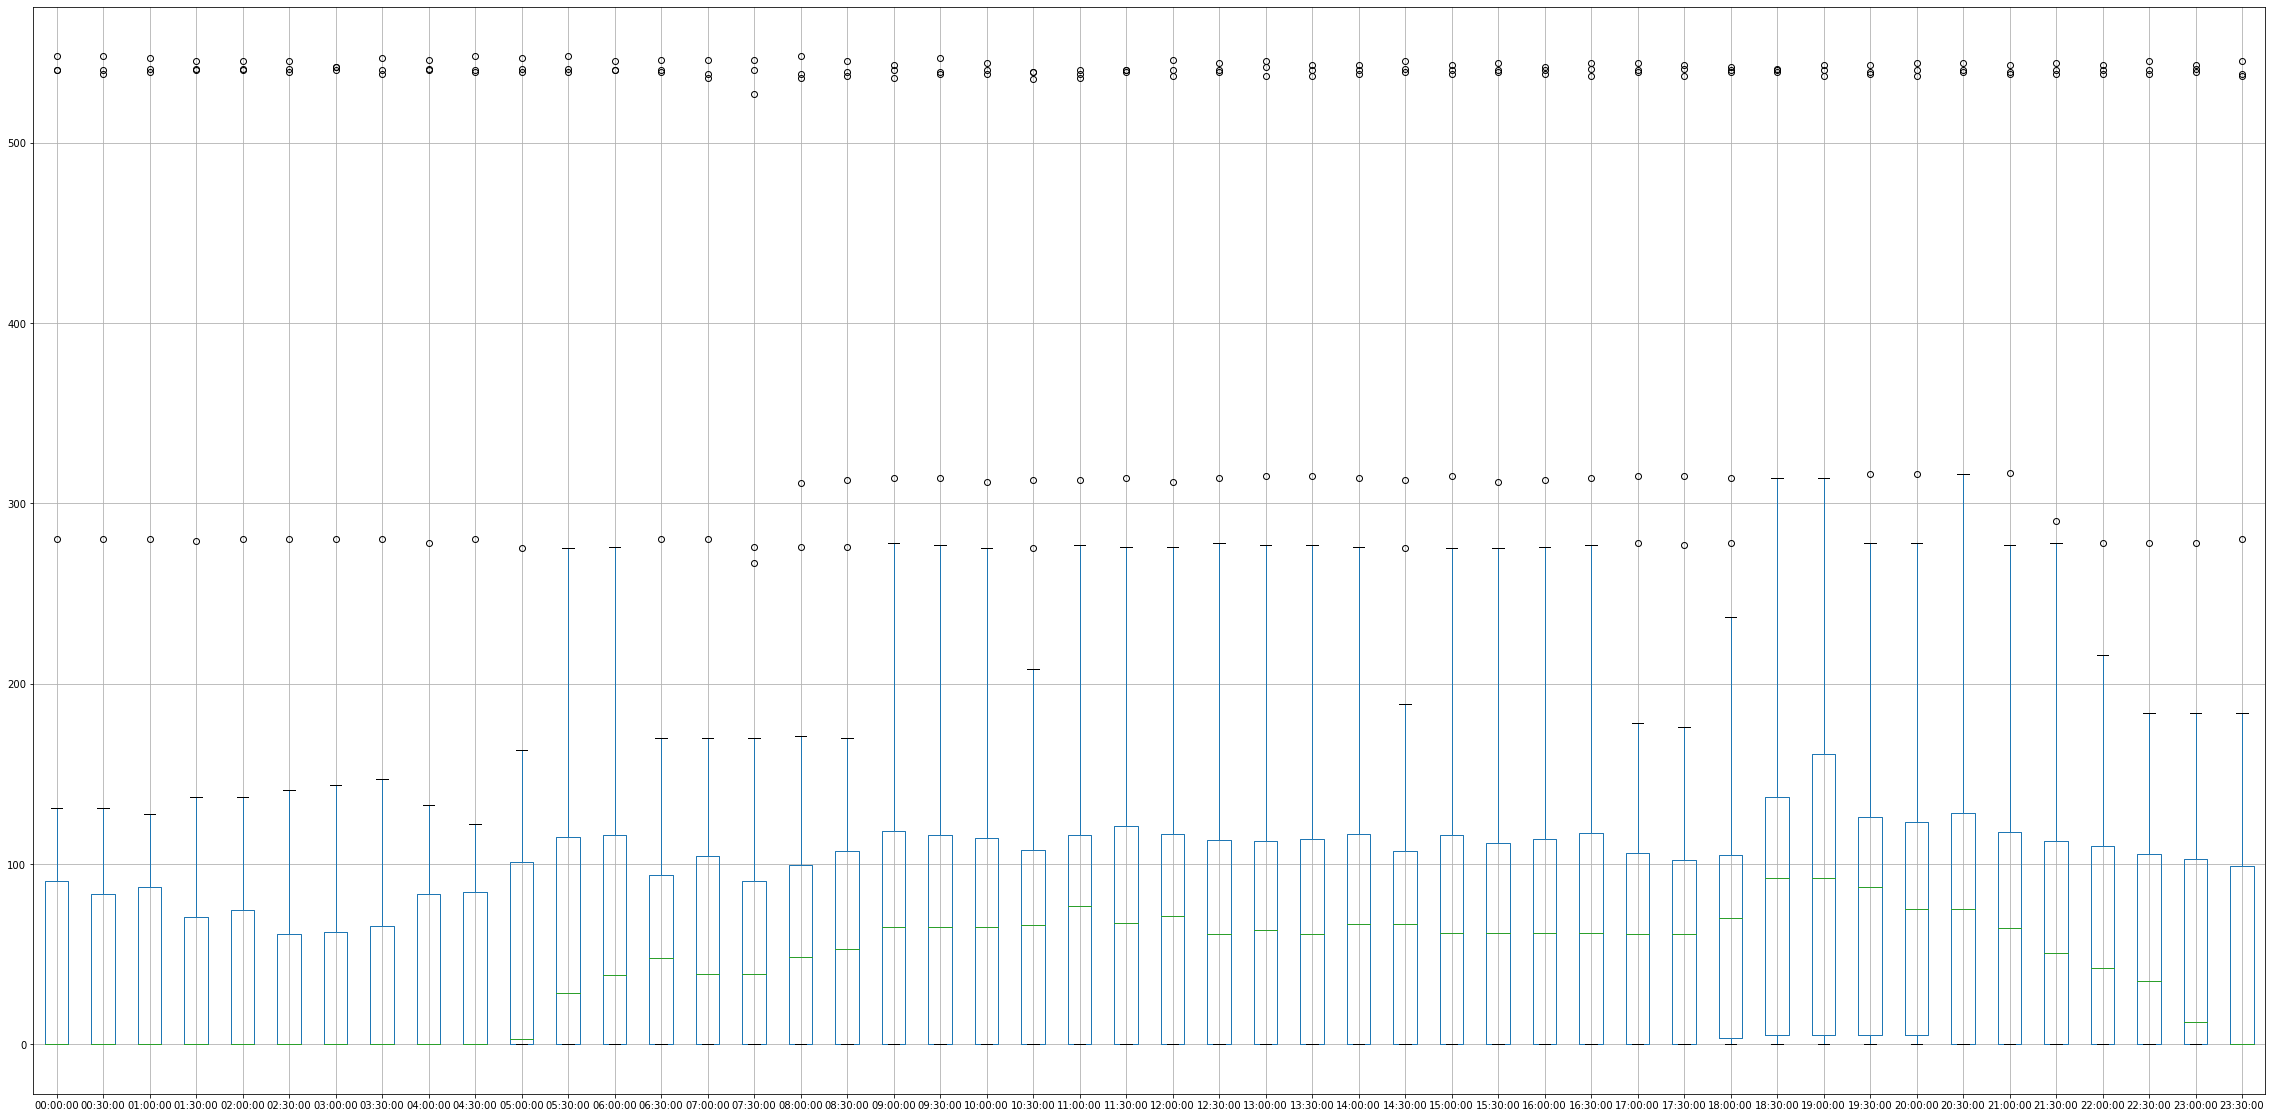

In [65]:
#Date:  2020-07-01 box plots by time..............(all plants values in that day considered)
cols=list(data_frames[0].columns)
date=data_frames[0].iloc[0]['Date']
cols.remove('Power_Plant')
cols.remove('Date')
for i in cols:
    data_frames[0][i] = data_frames[0][i].astype(float)

print('Date: ',date)
data_frames[0].boxplot(column=cols,figsize=(40,20))


Date:  2020-07-01
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-03
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-03
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
empty
Date:  2020-07-05
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-06
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-07
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-08
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-09
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-10
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-11
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-12
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-13
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-14
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-15
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-16
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-17
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Da

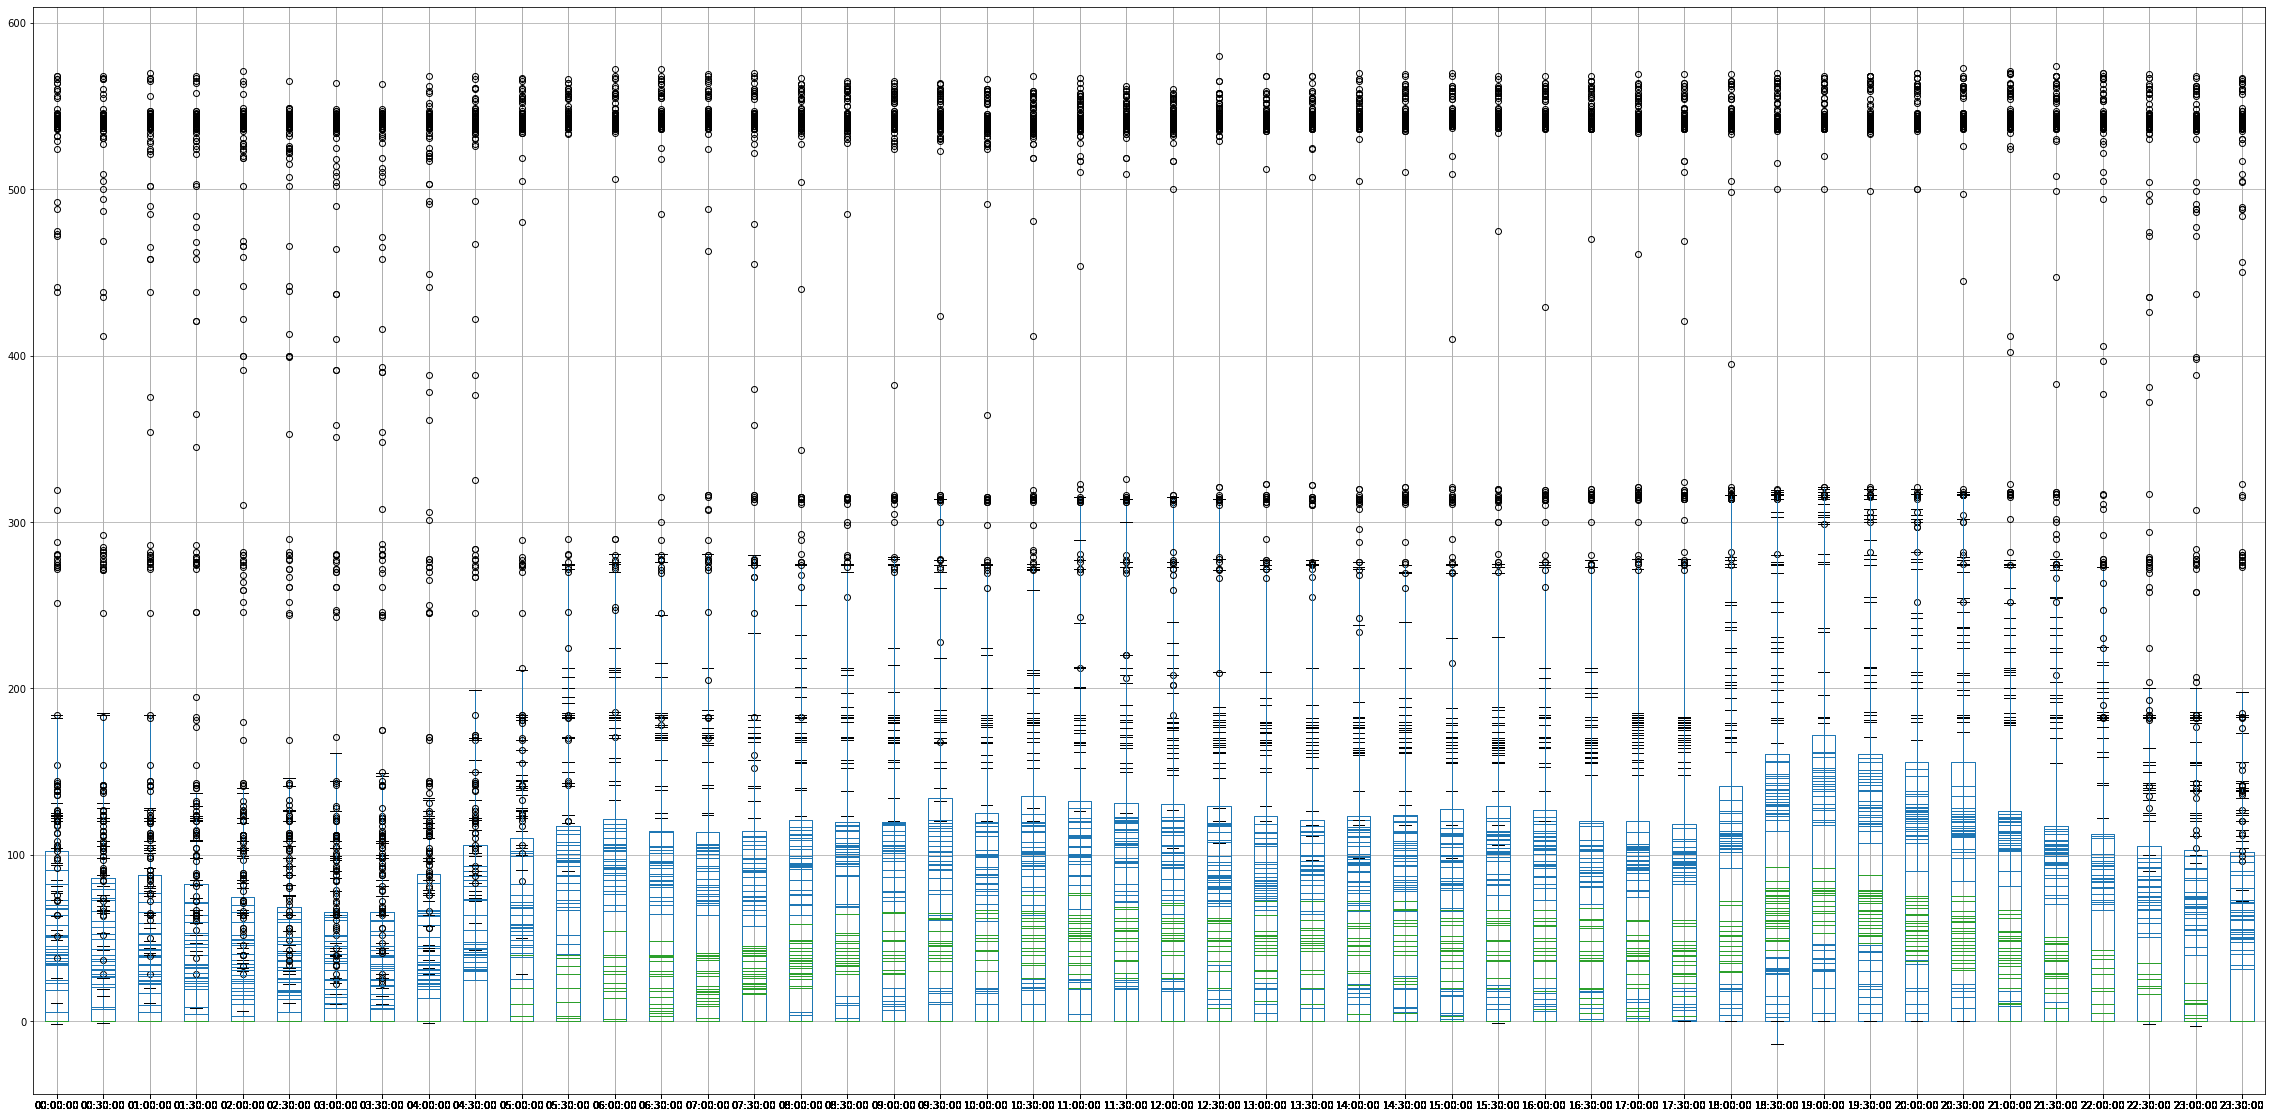

In [61]:
#this is not clear...so I make a function to get each day box plots(next cell)
z=1
for j in data_frames:
    if z==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        #print(cols)
        j.boxplot(column=cols,figsize=(40,20))
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    z=z+1

In [67]:
#function for get boxplots in each day....and looking the outliers..................
def boxplots(df):
    cols=list(df.columns)
    date=df.iloc[0]['Date']
    cols.remove('Power_Plant')
    cols.remove('Date')
    for i in cols:
        df[i] = df[i].astype(float)

    print('Date: ',date)
    df.boxplot(column=cols,figsize=(40,20))

Date:  2020-07-03


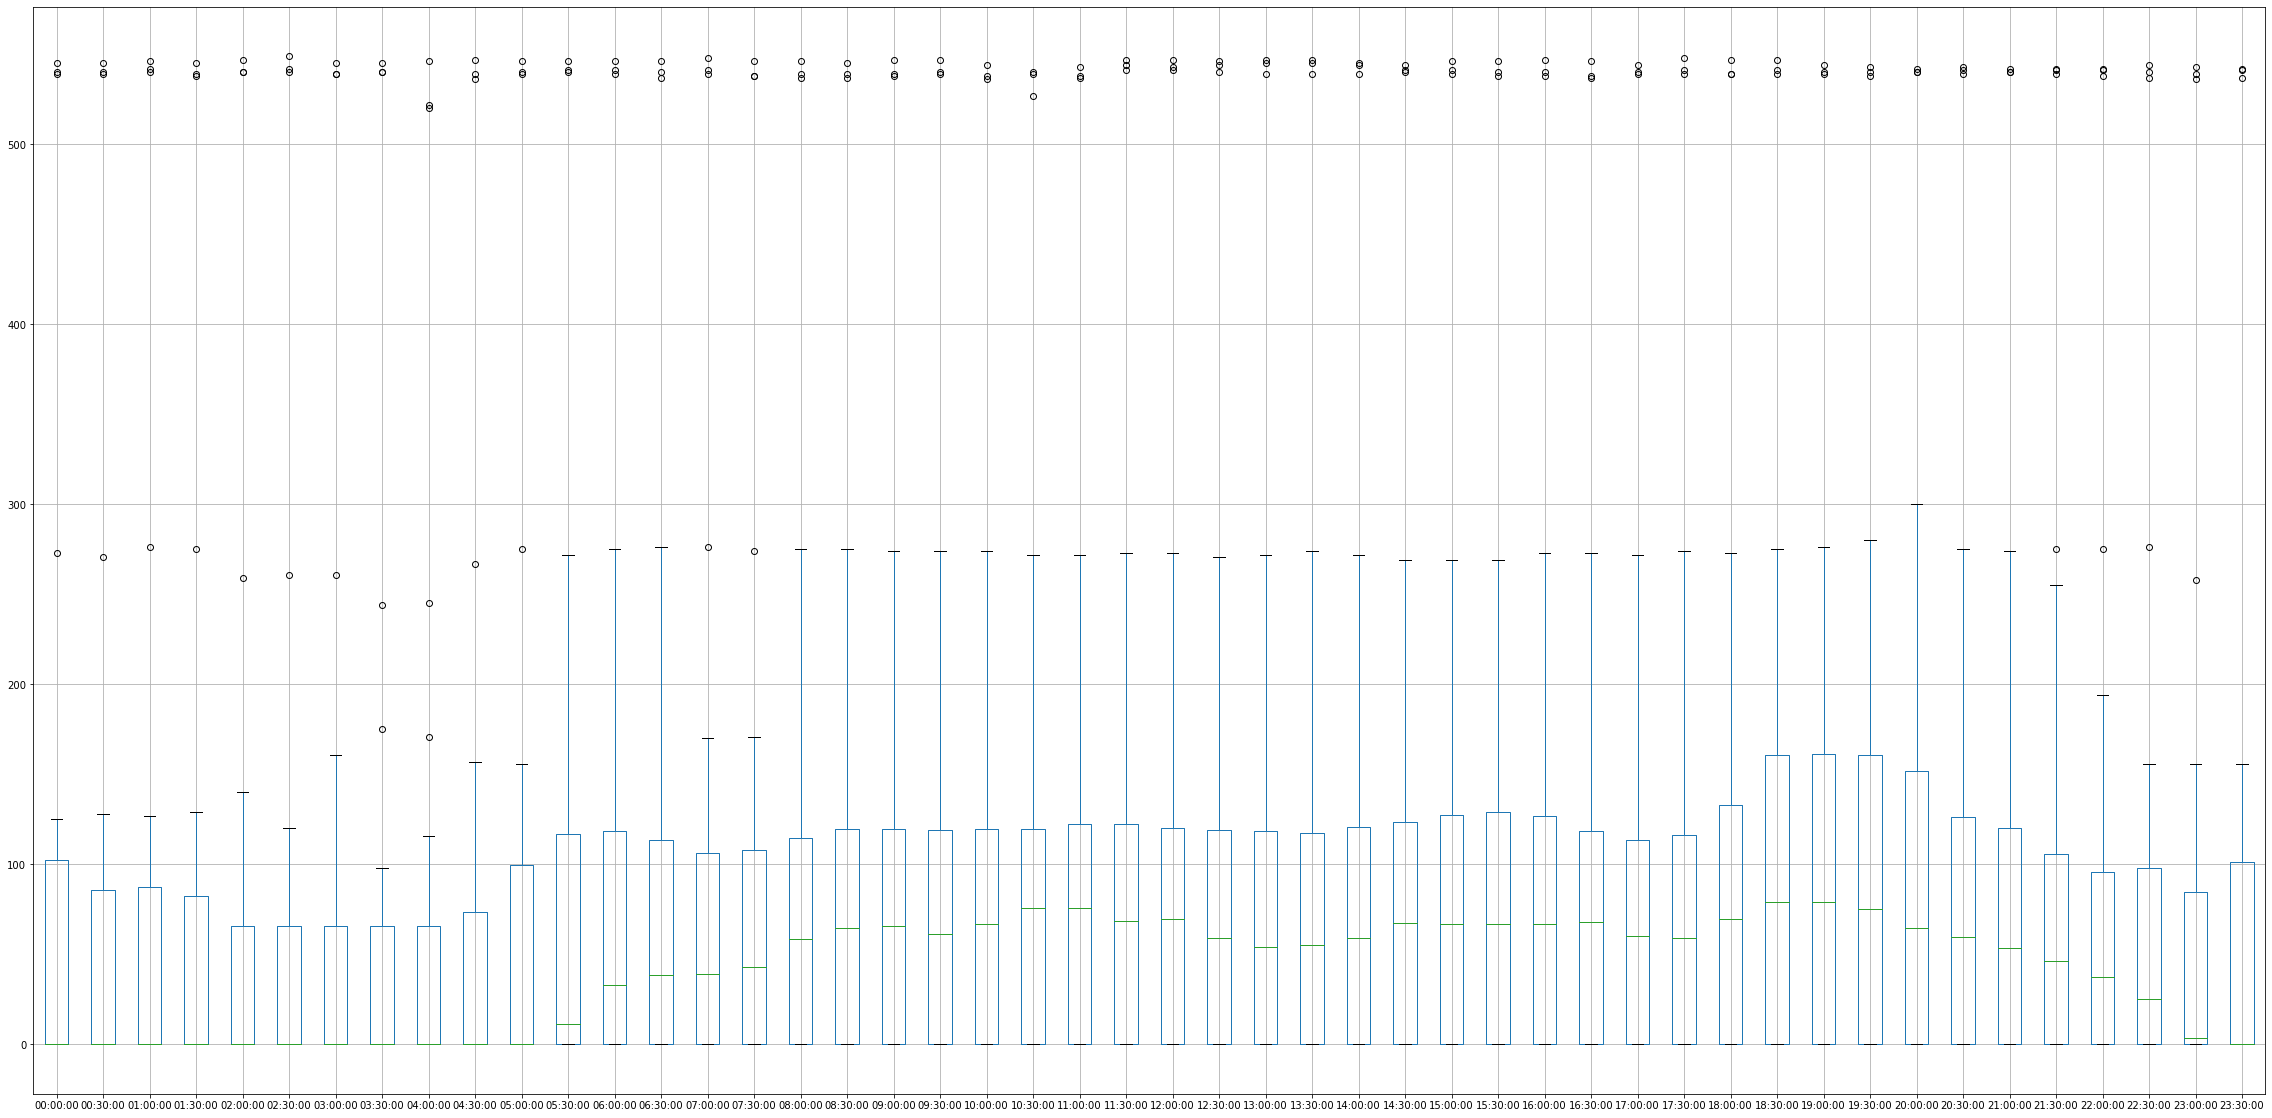

In [68]:
#2020-07-03 outliers for each time across all the plants...............
boxplots(data_frames[1])

# Forecast dispatch datasets

In [75]:
import os

In [76]:
def fileList(path):
    listOfFiles = os.listdir(path)
    files=[]
    
    for file in listOfFiles:
        fullPath = os.path.join(path, file) #full path for the file
        if os.path.isdir(fullPath): #if there are sub folders.....
            files = files + fileList(fullPath) #recursively loop through the sub folder
        else:
            files.append(fullPath)
                
    return files

all_the_files=fileList(r'E:\Desktop\Datasets\forcast_july')

In [77]:
##############
data_frames_1=[]
for file in all_the_files:
    df=pd.read_excel(file)
    df.columns = df.iloc[0] #make columns as 0th row items..
    columns=df.columns
    date=columns[1].date() 
    df=df.drop(0) #drop 0th row items
    df.columns = df.iloc[0] #make columns as 0th row items..
    df=df.drop(1)  #drop 1st row items
    plants_temp=df.iloc[:,0] #all the items in plant column(this includes unnessasary items)
    plants=[]
    #get only the correct plants...
    for plant in plants_temp:
        if plant=='Total Generation':
            break
        else:
            plants.append(plant)
    df = df.loc[:, df.columns.notnull()] #remove nan columns.............
    z=len(plants) #only get the relevant rows...............
    df=df.head(z) #only get the dataframe which contains the needed rows...
    df.insert(0, 'Power_Plant', plants)
    df=df.drop(columns=df.columns[-1:],axis=1) #drop the last column.......
    #df=pd.melt(df,id_vars=['Power_Plant']) #reshape the df using melt function...
    df['Date']=date
    data_frames_1.append(df)

In [80]:
p=1
for i in data_frames_1:
    #print(i.head())
    p=p+1
print(p)

30


In [82]:
data_frames_1[0].dtypes

1
Power_Plant    object
00:00:00       object
00:30:00       object
01:00:00       object
01:30:00       object
02:00:00       object
02:30:00       object
03:00:00       object
03:30:00       object
04:00:00       object
04:30:00       object
05:00:00       object
05:30:00       object
06:00:00       object
06:30:00       object
07:00:00       object
07:30:00       object
08:00:00       object
08:30:00       object
09:00:00       object
09:30:00       object
10:00:00       object
10:30:00       object
11:00:00       object
11:30:00       object
12:00:00       object
12:30:00       object
13:00:00       object
13:30:00       object
14:00:00       object
14:30:00       object
15:00:00       object
15:30:00       object
16:00:00       object
16:30:00       object
17:00:00       object
17:30:00       object
18:00:00       object
18:30:00       object
19:00:00       object
19:30:00       object
20:00:00       object
20:30:00       object
21:00:00       object
21:30:00       object
22:00:00

In [83]:
data_frames_1[0].columns

Index(['Power_Plant',      00:00:00,      00:30:00,      01:00:00,
            01:30:00,      02:00:00,      02:30:00,      03:00:00,
            03:30:00,      04:00:00,      04:30:00,      05:00:00,
            05:30:00,      06:00:00,      06:30:00,      07:00:00,
            07:30:00,      08:00:00,      08:30:00,      09:00:00,
            09:30:00,      10:00:00,      10:30:00,      11:00:00,
            11:30:00,      12:00:00,      12:30:00,      13:00:00,
            13:30:00,      14:00:00,      14:30:00,      15:00:00,
            15:30:00,      16:00:00,      16:30:00,      17:00:00,
            17:30:00,      18:00:00,      18:30:00,      19:00:00,
            19:30:00,      20:00:00,      20:30:00,      21:00:00,
            21:30:00,      22:00:00,      22:30:00,      23:00:00,
            23:30:00,        'Date'],
      dtype='object', name=1)

# outlier detection by z-score

In [84]:
t1=1
for j in data_frames_1:
    if t1==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            out_1=findoutliers(j[i])
            print('time    :',i)
            print('outliers:',out_1)
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    t1=t1+1

Date:  2020-07-01
time    : 00:00:00
outliers: [270.0, 270.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 259.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
outliers: 

time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270

time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:30:00
outliers: [270.0, 270

****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-22
time    : 00:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: 

Date:  2020-07-26
time    : 00:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
out

****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 1

time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 18:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 18:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 19:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 19:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 20:00:00
outliers: [270.0, 270

****************************
time    : 21:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


# outlier detection by IQR

In [85]:
m1=1
for j in data_frames_1:
    if m1==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            q1 = j[i].quantile(0.25)
            q3 = j[i].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 -(1.5 * iqr) 
            upper_bound = q3 +(1.5 * iqr)
            
            out_1=outliersIQR(j[i],upper_bound,lower_bound)
            print('time    :',i)
            print('outliers:',out_1)
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    m1=m1+1

Date:  2020-07-01
time    : 00:00:00
outliers: [270.0, 270.0, 229.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 259.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0, 150.0]
********

time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270

time    : 11:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 14:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 15:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 15:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 16:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 16:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 17:00:00
outliers: [270.0, 270.0,

time    : 21:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-17
time    : 00:00:00
outliers: [270.0, 270.0, 270.0, 85.0, 89.969]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0, 85.0, 82.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0, 77.333]
****************************
time    : 01:30:00
outliers: [262.24, 270.0, 270.0, 85.0, 82.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
************

time    : 00:30:00
outliers: [51.783, 270.0, 270.0, 270.0, 54.0, 85.0, 50.0, 60.0, 68.0]
****************************
time    : 01:00:00
outliers: [51.783, 270.0, 270.0, 270.0, 85.0, 50.0, 54.0, 63.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0, 81.735, 62.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0, 54.0, 50.994, 85.0, 50.0, 35.0, 61.0]
****************************
time    : 02:30:00
outliers: [51.783, 270.0, 270.0, 270.0, 76.486, 59.0]
****************************
time    : 03:00:00
outliers: [51.783, 270.0, 270.0, 270.0, 42.0, 34.0, 79.611, 46.767, 58.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0, 48.161, 34.0, 85.0, 50.0, 43.0, 53.0]
****************************
time    : 04:00:00
outliers: [51.657, 263.84, 270.0, 270.0, 61.667, 50.0]
****************************
time    : 04:30:00
outliers: [51.783, 270.0, 270.0, 270.0, 85.0, 50.0]
****************************
time    : 05:

time    : 04:00:00
outliers: [81.515, 268.46, 270.0, 270.0, 34.0, 85.0, 50.0, 50.0, 48.0]
****************************
time    : 04:30:00
outliers: [84.765, 270.0, 270.0, 270.0, 74.0, 65.0]
****************************
time    : 05:00:00
outliers: [90.165, 270.0, 270.0, 270.0, 72.0, 85.0, 80.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0, 85.0, 76.667, 95.0]
****************************
time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0, 150.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
***********************

time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0, 150.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
*************

time    : 07:30:00
outliers: [270.0, 270.0, 270.0, 92.82, 100.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0, 92.82, 100.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13

time    : 13:00:00
outliers: [103.22, 270.0, 270.0, 270.0, 85.0]
****************************
time    : 13:30:00
outliers: [102.42, 270.0, 270.0, 270.0, 72.0, 85.0]
****************************
time    : 14:00:00
outliers: [101.92, 270.0, 270.0, 270.0, 72.0, 85.0]
****************************
time    : 14:30:00
outliers: [101.57, 270.0, 270.0, 270.0, 72.0, 85.0]
****************************
time    : 15:00:00
outliers: [101.47, 270.0, 270.0, 270.0, 72.0, 85.0]
****************************
time    : 15:30:00
outliers: [102.97, 270.0, 270.0, 270.0, 85.0]
****************************
time    : 16:00:00
outliers: [103.47, 270.0, 270.0, 270.0, 72.0, 85.0]
****************************
time    : 16:30:00
outliers: [104.62, 270.0, 270.0, 270.0, 85.0]
****************************
time    : 17:00:00
outliers: [107.12, 270.0, 270.0, 270.0]
****************************
time    : 17:30:00
outliers: [108.67, 270.0, 270.0, 270.0]
****************************
time    : 18:00:00
outliers: [270.0, 270.0

time    : 18:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 18:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 19:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 19:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 20:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 20:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0, 163.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0, 163.0, 100.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0, 163.0, 85.0, 85.0, 100.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
**********************

time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-06
time    : 00:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [60.472, 270.0, 270.0, 270.0, 51.086, 63.0, 60.0, 56.0, 64.0]
****************************
time    : 02:30:00
outliers: [60.472, 270.0, 270.0, 270.0, 47.244, 63.0, 60.0, 53.0, 57.0]
*******

time    : 01:00:00
outliers: [270.0, 270.0, 270.0, 54.0, 63.0, 60.0, 85.0, 61.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0, 54.0, 63.0, 60.0, 85.0, 66.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0, 54.0, 63.0, 60.0, 85.0, 65.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0, 74.0, 73.506, 86.503]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0, 85.0, 85.0, 100.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0, 100.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
***********

time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0, 85.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.

# outlier detection by percentiles

In [86]:
n1=1
for j in data_frames_1:
    if n1==4: #for the 4th sheet(because it's empty)
        print('empty')
    else:
        cols=list(j.columns)
        date=j.iloc[0]['Date']
        cols.remove('Power_Plant')
        cols.remove('Date')
        for i in cols:
            j[i] = j[i].astype(float)

        print('Date: ',date)
        for i in cols:
            upper_limit=j[i].quantile(0.95)
            lower_limit=j[i].quantile(0.05)
            out_1=j[i][(j[i]>upper_limit) | (j[i]<lower_limit)]
            print('time    :',i)
            print('outliers:',list(out_1))
            print('****************************') 
        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    n1=n1+1

Date:  2020-07-01
time    : 00:00:00
outliers: [270.0, 270.0, 229.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 259.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
out

time    : 20:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 20:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-14
time    : 00:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
*******

outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 17:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 18:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 18:30:00
outliers: [270.0, 270.0, 270.0]
********

time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [269.46, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [268.34, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [268.46, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 06:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 07:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 08:30:00
outliers: [270.0, 

time    : 21:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 21:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 22:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-24
time    : 00:00:00
outliers: [270.0, 270.0, 240.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
*******

time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 15:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 16:00:00
outliers: [270.0, 270

time    : 08:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 09:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 10:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 11:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 12:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 13:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 14:30:00
outliers: [270.0, 270

time    : 23:30:00
outliers: [270.0, 270.0, 270.0]
****************************
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Date:  2020-07-03
time    : 00:00:00
outliers: [270.0, 270.0, 229.0]
****************************
time    : 00:30:00
outliers: [270.0, 270.0, 259.0]
****************************
time    : 01:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 01:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 02:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 03:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:00:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 04:30:00
outliers: [270.0, 270.0, 270.0]
****************************
time    : 05:00:00
outliers: [270.0, 270.0, 270.0]
*******

# Outliers identify by boxplots

Date:  2020-07-10


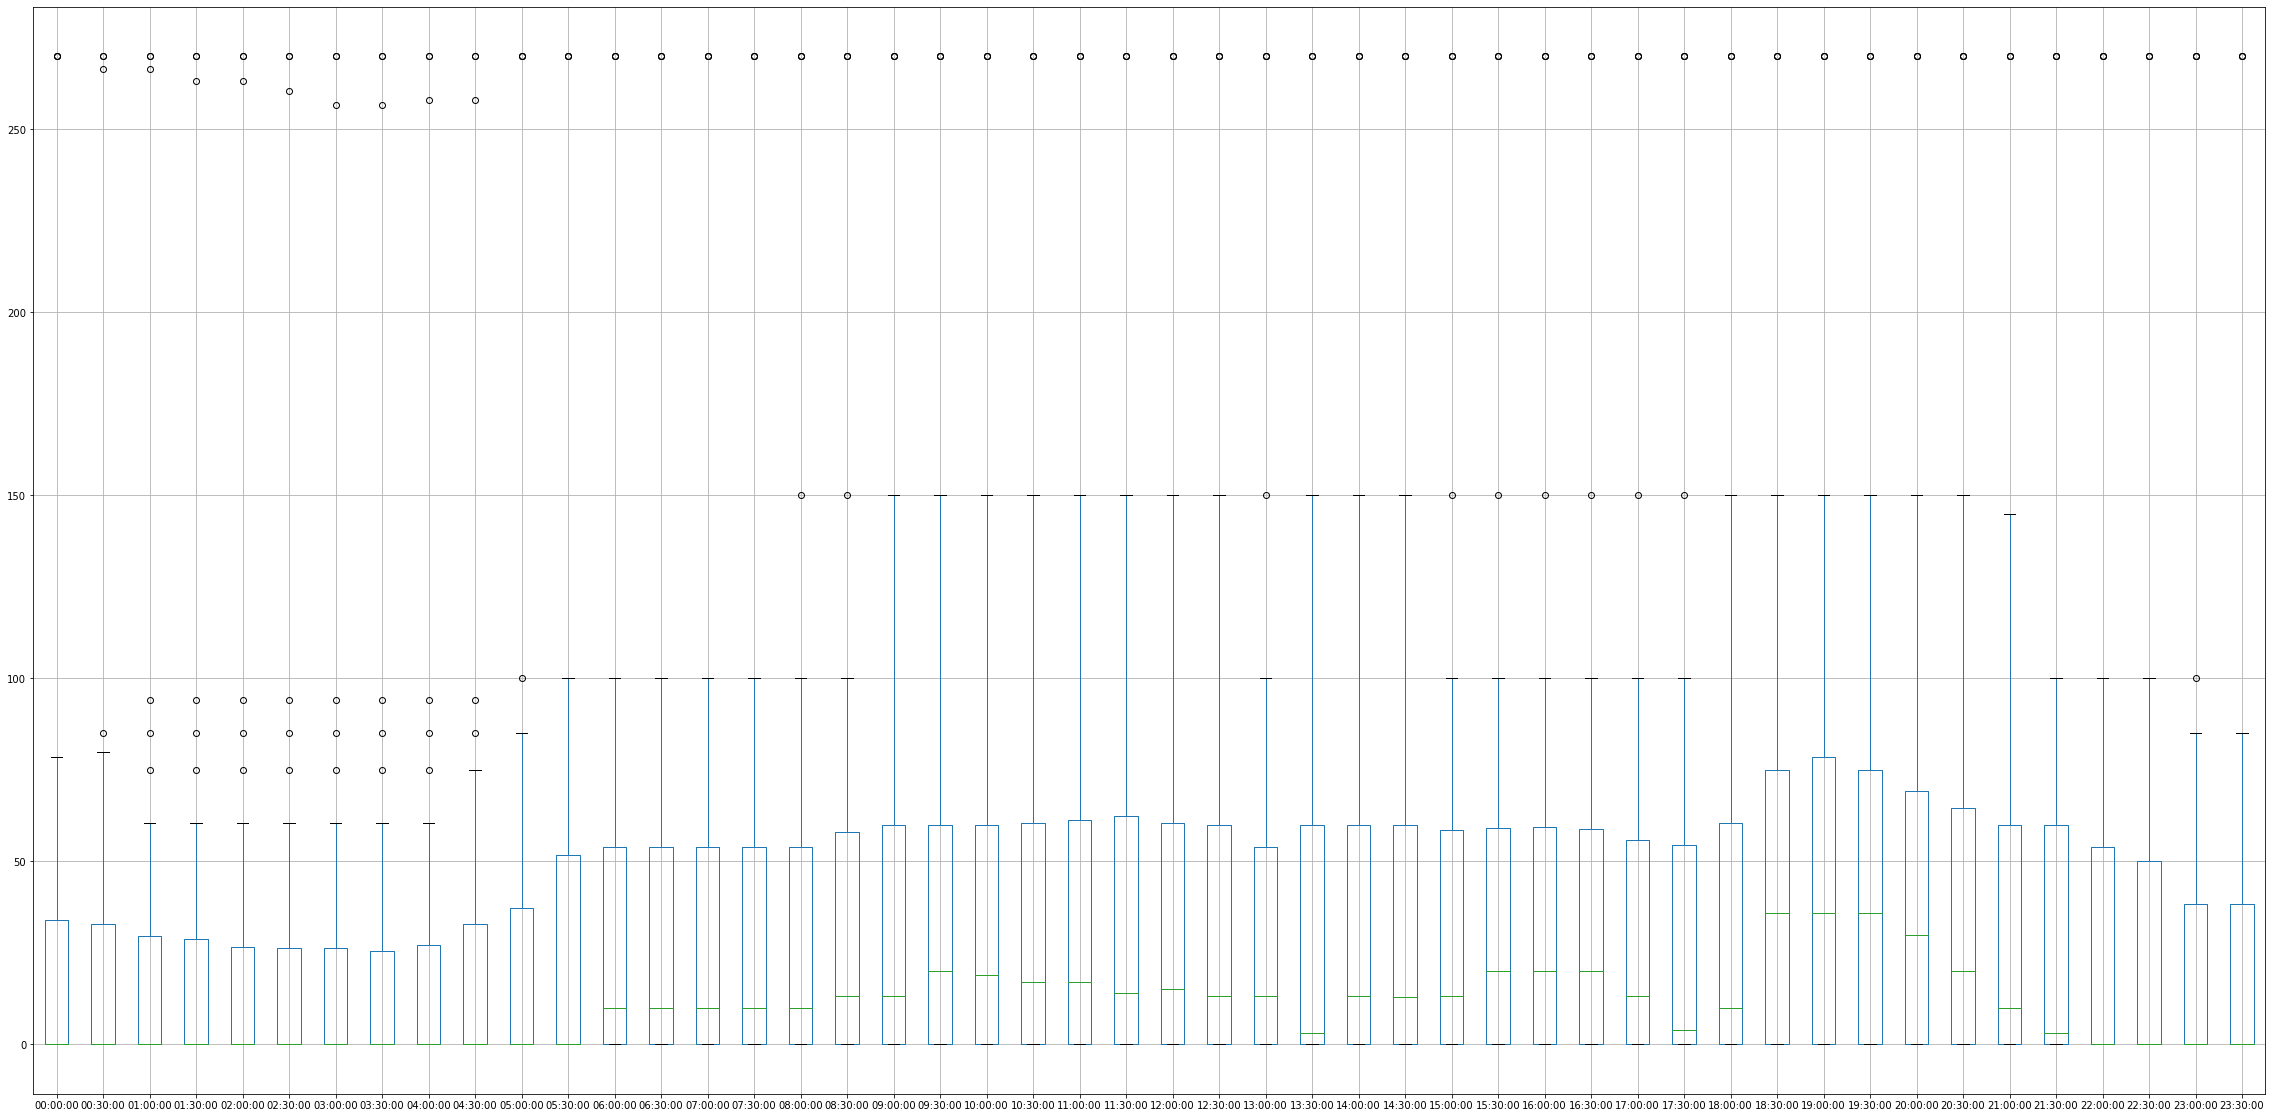

In [87]:
#use the same function defined under the actual dispatch ......
boxplots(data_frames_1[1])